In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
hit = pd.read_csv("Hitters.csv")
df =hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
x_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
x = pd.concat([x_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


In [4]:
rf_model = RandomForestRegressor(random_state=42)

In [5]:
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

# Tahmin

In [6]:
y_pred = rf_model.predict(x_test)

In [7]:
np.sqrt(mean_squared_error(y_test,y_pred))

344.8191624908484

# Model Tuning

In [8]:
rf_params = {"max_depth": list(range(1,10)),
            "max_features": [3,5,10,15],
            "n_estimators" : [200,500,1000,2000,100]}

In [9]:
rf_model = RandomForestRegressor(random_state=42)

In [10]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1)

In [11]:
rf_cv_model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [200, 500, 1000, 2000, 100]})

In [12]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [13]:
rf_tuned = RandomForestRegressor(max_depth= 8,max_features=3,n_estimators = 200)

In [14]:
rf_tuned.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [15]:
y_pred = rf_tuned.predict(x_test)

In [16]:
np.sqrt(mean_squared_error(y_test,y_pred))

345.43534116000217

In [18]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = x_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

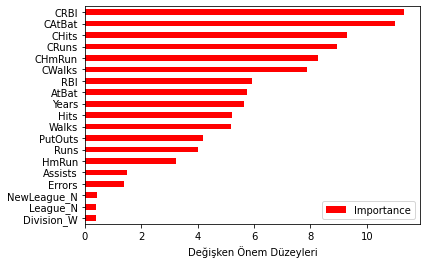

In [21]:
Importance.sort_values(by = "Importance", axis=0, ascending=True).plot(kind="barh",color ="r")

plt.xlabel("Değişken Önem Düzeyleri")